In [114]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Available features and their descriptions
Case_Id : Storing Unique ids with respect to cases
Hospital_Code : Unique Code for Hospitals in which particular case is being investigated
Hospital_type_code : Unique Code for Type of Hospitals
Hospital_region_code : Region of Hospitals
Available Extra Rooms in Hospital : No. of extra rooms available
Department : Department overlooking the case
Ward_Type : Unique code for ward type
Ward_Facility_Code : Unique code for ward facility
Bed Grade : Condition for Bed in Hospital
Patient_Id : Patient id undergoing current case
City_Code_Patient : City code for the patient
Type_of_Admission : Admission type registered by hospital
Severity of illness : severity recorded at time of admission
Visitors with Patient : No. of visitors with patient
Age : Age of the patient
Admission_Deposit : Deposit at admission time
Stay : Target Variable Stay which depicts no. of days the patient stayed at hospital

## 2. Reading the training and testing datasets

In [116]:
#Reading data

#raw_train_data = pd.read_csv('/Users/mayuraitavadekar/Desktop/fall-2021/fds/project/lengthOfStay/data/train_data.csv')
#raw_test_data = pd.read_csv('/Users/mayuraitavadekar/Desktop/fall-2021/fds/project/lengthOfStay/data/test_data.csv')

raw_train_data = pd.read_csv('/Users/nikhilkarve/Desktop/study/fall2021/FDS/Project/healthcare/data/train_data.csv')
raw_test_data = pd.read_csv('/Users/nikhilkarve/Desktop/study/fall2021/FDS/Project/healthcare/data/test_data.csv')

## 3. Data Understanding

> 3.1 Display the raw dataset

> 3.2 Understanding descriptive features

> 3.3 Understand the data types



### 3.1 Display Raw Dataset

In [117]:
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


#### By observing data we can see that we don't need case_id and hospital_code

### 3.2 Understanding Descriptive Featuers

In [118]:
raw_train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [119]:
raw_train_data.shape

(318438, 18)

In [120]:
raw_train_data['Admission_Deposit']

0         4911.0
1         5954.0
2         4745.0
3         7272.0
4         5558.0
           ...  
318433    4144.0
318434    6699.0
318435    4235.0
318436    3761.0
318437    4752.0
Name: Admission_Deposit, Length: 318438, dtype: float64

### 3.3 Understand the data types

In [121]:
raw_train_data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

## 4. Data Exploration

> 4.1 Prepare Data Quality Report

>> 4.1.1 Data Quality Report for Categorical Descriptive Features
    
>> 4.1.2 Data Quality Report for Continuous Descritive Features

> 4.2 Data Visualization

> 4.3 Determine the Data Quality Issues - Missing Values and Outliers

> 4.4 Handling Data Quality Issues

### 4.1 Prepare Data Quality Report

In [122]:
cat_features = raw_train_data.select_dtypes(include='object')

In [123]:
cat_features = list(cat_features.columns)

In [124]:
# we have some features whose values are numeric but need to be considered as categorical. we will append them.

In [125]:
cat_features.append('Hospital_code')
cat_features.append('City_Code_Hospital')

In [126]:
cat_features.append('Bed Grade')
cat_features.append('City_Code_Patient')

In [127]:
cat_features.append('Available Extra Rooms in Hospital')
cat_features.append('Visitors with Patient')

In [128]:
cat_features

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Hospital_code',
 'City_Code_Hospital',
 'Bed Grade',
 'City_Code_Patient',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient']

In [129]:
#cat_features.remove('Bed Grade')

In [130]:
cat_features.remove('City_Code_Hospital')

In [131]:
# following are available categorical features

In [132]:
cat_features

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay',
 'Hospital_code',
 'Bed Grade',
 'City_Code_Patient',
 'Available Extra Rooms in Hospital',
 'Visitors with Patient']

In [133]:
print('There are total {} categorical features in the data'.format(len(cat_features)))

There are total 14 categorical features in the data


In [134]:
set(list(raw_train_data.columns)) - set(cat_features)

{'Admission_Deposit', 'City_Code_Hospital', 'case_id', 'patientid'}

In [135]:
# describe function will work on categorical features whose values are numerical. So we will get only few features
# from cat_features array here. For others we need to work manually.
raw_train_data[cat_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.0,3.0,3.0,4.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.0,8.0,8.0,38.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.0,3.0,4.0,32.0


In [136]:
# we need to calculate following:
# % missing, Mode, Second Mode, Mode freqn, second mode freqn, Mode %, 2nd Mode %, Cardinality, 

In [137]:
raw_train_data['City_Code_Hospital'].unique().sort()

In [138]:
len(cat_features)

14

In [139]:
raw_train_data[cat_features].dtypes

Hospital_type_code                    object
Hospital_region_code                  object
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Type of Admission                     object
Severity of Illness                   object
Age                                   object
Stay                                  object
Hospital_code                          int64
Bed Grade                            float64
City_Code_Patient                    float64
Available Extra Rooms in Hospital      int64
Visitors with Patient                  int64
dtype: object

In [140]:
cat_data_desc = raw_train_data[cat_features].describe(include=['object', 'int64', 'float64']).transpose()
cat_data_desc

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Hospital_type_code,318438,7,a,143425,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital_region_code,318438,3,X,133336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,318438,5,gynecology,249486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ward_Type,318438,6,R,127947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ward_Facility_Code,318438,6,F,112753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type of Admission,318438,3,Trauma,152261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity of Illness,318438,3,Moderate,175843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,318438,10,41-50,63749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay,318438,11,21-30,87491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital_code,318438.0,NaN,NaN,NaN,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0


In [141]:
cat_data_desc.drop(['mean','std','min','25%','50%', '75%','max'], inplace=True, axis=1)

In [142]:
cat_data_desc

,count,unique,top,freq
Hospital_type_code,318438,7,a,143425
Hospital_region_code,318438,3,X,133336
Department,318438,5,gynecology,249486
Ward_Type,318438,6,R,127947
Ward_Facility_Code,318438,6,F,112753
Type of Admission,318438,3,Trauma,152261
Severity of Illness,318438,3,Moderate,175843
Age,318438,10,41-50,63749
Stay,318438,11,21-30,87491
Hospital_code,318438.0,NaN,NaN,NaN


In [143]:
added_missing_data = pd.DataFrame(raw_train_data[cat_features].isna().sum(), columns=['Missing Values'])

In [144]:
added_missing_data.reset_index(level=0, inplace=True)
added_missing_data

,index,Missing Values
0,Hospital_type_code,0
1,Hospital_region_code,0
2,Department,0
3,Ward_Type,0
4,Ward_Facility_Code,0
5,Type of Admission,0
6,Severity of Illness,0
7,Age,0
8,Stay,0
9,Hospital_code,0


In [145]:
added_missing_data.rename(columns = {'index': 'Features'}, inplace=True)

In [146]:
added_missing_data

,Features,Missing Values
0,Hospital_type_code,0
1,Hospital_region_code,0
2,Department,0
3,Ward_Type,0
4,Ward_Facility_Code,0
5,Type of Admission,0
6,Severity of Illness,0
7,Age,0
8,Stay,0
9,Hospital_code,0


In [147]:
cat_data_desc.reset_index(level=0, inplace=True)

In [148]:
cat_data_desc

,index,count,unique,top,freq
0,Hospital_type_code,318438,7,a,143425
1,Hospital_region_code,318438,3,X,133336
2,Department,318438,5,gynecology,249486
3,Ward_Type,318438,6,R,127947
4,Ward_Facility_Code,318438,6,F,112753
5,Type of Admission,318438,3,Trauma,152261
6,Severity of Illness,318438,3,Moderate,175843
7,Age,318438,10,41-50,63749
8,Stay,318438,11,21-30,87491
9,Hospital_code,318438.0,NaN,NaN,NaN


In [149]:
cat_data_desc.rename(columns = {'index': 'Features'}, inplace=True)

In [150]:
cat_data_desc.drop(['unique','top','freq'], inplace=True, axis=1)

In [151]:
unique_vals = pd.DataFrame(raw_train_data.nunique(), columns=['unique'])

In [152]:
unique_vals.reset_index(level=0, inplace=True)
unique_vals.rename(columns = {'index': 'Features'}, inplace=True)

In [153]:
unique_vals

,Features,unique
0,case_id,318438
1,Hospital_code,32
2,Hospital_type_code,7
3,City_Code_Hospital,11
4,Hospital_region_code,3
5,Available Extra Rooms in Hospital,18
6,Department,5
7,Ward_Type,6
8,Ward_Facility_Code,6
9,Bed Grade,4


In [154]:
cat_data_summary = pd.merge(unique_vals, cat_data_desc, on='Features')

In [155]:
cat_data_summary

,Features,unique,count
0,Hospital_code,32,318438.0
1,Hospital_type_code,7,318438
2,Hospital_region_code,3,318438
3,Available Extra Rooms in Hospital,18,318438.0
4,Department,5,318438
5,Ward_Type,6,318438
6,Ward_Facility_Code,6,318438
7,Bed Grade,4,318325.0
8,City_Code_Patient,37,313906.0
9,Type of Admission,3,318438


In [156]:
added_missing_data

,Features,Missing Values
0,Hospital_type_code,0
1,Hospital_region_code,0
2,Department,0
3,Ward_Type,0
4,Ward_Facility_Code,0
5,Type of Admission,0
6,Severity of Illness,0
7,Age,0
8,Stay,0
9,Hospital_code,0


In [157]:
cat_data_summary = pd.merge(cat_data_summary, added_missing_data, on='Features')

In [158]:
cat_data_summary['% of missing'] = cat_data_summary['Missing Values']/cat_data_summary['count']

In [159]:
cat_data_summary['% of missing'] = cat_data_summary['% of missing']*100

In [160]:
cat_data_summary.drop(['Missing Values'], inplace=True, axis = 1)

In [161]:
cat_data_summary

,Features,unique,count,% of missing
0,Hospital_code,32,318438.0,0.0
1,Hospital_type_code,7,318438,0.0
2,Hospital_region_code,3,318438,0.0
3,Available Extra Rooms in Hospital,18,318438.0,0.0
4,Department,5,318438,0.0
5,Ward_Type,6,318438,0.0
6,Ward_Facility_Code,6,318438,0.0
7,Bed Grade,4,318325.0,0.035498
8,City_Code_Patient,37,313906.0,1.443744
9,Type of Admission,3,318438,0.0


In [162]:
mode_data = raw_train_data[cat_features].mode().transpose()

In [163]:
mode_data.reset_index(level=0, inplace=True)


In [164]:
mode_data

,index,0
0,Hospital_type_code,a
1,Hospital_region_code,X
2,Department,gynecology
3,Ward_Type,R
4,Ward_Facility_Code,F
5,Type of Admission,Trauma
6,Severity of Illness,Moderate
7,Age,41-50
8,Stay,21-30
9,Hospital_code,26


In [165]:
mode_data.rename(columns = {'index': 'Features', 0:'Mode'}, inplace=True)

In [166]:
mode_data

,Features,Mode
0,Hospital_type_code,a
1,Hospital_region_code,X
2,Department,gynecology
3,Ward_Type,R
4,Ward_Facility_Code,F
5,Type of Admission,Trauma
6,Severity of Illness,Moderate
7,Age,41-50
8,Stay,21-30
9,Hospital_code,26


In [167]:
cat_data_summary = pd.merge(cat_data_summary, mode_data, on='Features')

In [168]:
cat_data_summary

,Features,unique,count,% of missing,Mode
0,Hospital_code,32,318438.0,0.0,26
1,Hospital_type_code,7,318438,0.0,a
2,Hospital_region_code,3,318438,0.0,X
3,Available Extra Rooms in Hospital,18,318438.0,0.0,2
4,Department,5,318438,0.0,gynecology
5,Ward_Type,6,318438,0.0,R
6,Ward_Facility_Code,6,318438,0.0,F
7,Bed Grade,4,318325.0,0.035498,2.0
8,City_Code_Patient,37,313906.0,1.443744,8.0
9,Type of Admission,3,318438,0.0,Trauma


In [169]:
raw_train_data['Ward_Facility_Code'].value_counts()[1]

55351

In [170]:
keys = []
values = []
for col in cat_data_summary['Features']:
    lol = dict(raw_train_data[col].value_counts())
    key, value = list(lol.items())[1]
    keys.append(key)
    values.append(value)

In [171]:
keys

[23,
 'b',
 'Y',
 4,
 'anesthesia',
 'Q',
 'E',
 3.0,
 2.0,
 'Emergency',
 'Minor',
 4,
 '31-40',
 '11-20']

In [172]:
values

[26566,
 68946,
 122428,
 91709,
 29649,
 106165,
 55351,
 110583,
 38869,
 117676,
 85872,
 79225,
 63639,
 78139]

In [173]:
valueCountsCat = pd.DataFrame(index = keys, columns = ["Score"], data = values)

In [174]:
valueCountsCat

,Score
23,26566
b,68946
Y,122428
4,91709
anesthesia,29649
Q,106165
E,55351
3.0,110583
2.0,38869
Emergency,117676


In [175]:
valueCountsCat.reset_index(level=0, inplace=True)
#valueCountsCat.drop('level_0',axis=1, inplace=True)
valueCountsCat.rename({'index': '2nd Mode', 'Score': '2nd Mode Freqn'}, axis =1, inplace=True)
valueCountsCat

,2nd Mode,2nd Mode Freqn
0,23,26566
1,b,68946
2,Y,122428
3,4,91709
4,anesthesia,29649
5,Q,106165
6,E,55351
7,3.0,110583
8,2.0,38869
9,Emergency,117676


In [176]:
valueCountsCat.reset_index(level=0, inplace=True)
cat_data_summary.reset_index(level=0, inplace=True)

In [177]:
valueCountsCat

,index,2nd Mode,2nd Mode Freqn
0,0,23,26566
1,1,b,68946
2,2,Y,122428
3,3,4,91709
4,4,anesthesia,29649
5,5,Q,106165
6,6,E,55351
7,7,3.0,110583
8,8,2.0,38869
9,9,Emergency,117676


In [178]:
cat_data_summary = pd.merge(cat_data_summary, valueCountsCat, on='index')
cat_data_summary.drop(['index'], inplace=True, axis=1)

In [179]:
cat_data_summary

,Features,unique,count,% of missing,Mode,2nd Mode,2nd Mode Freqn
0,Hospital_code,32,318438.0,0.0,26,23,26566
1,Hospital_type_code,7,318438,0.0,a,b,68946
2,Hospital_region_code,3,318438,0.0,X,Y,122428
3,Available Extra Rooms in Hospital,18,318438.0,0.0,2,4,91709
4,Department,5,318438,0.0,gynecology,anesthesia,29649
5,Ward_Type,6,318438,0.0,R,Q,106165
6,Ward_Facility_Code,6,318438,0.0,F,E,55351
7,Bed Grade,4,318325.0,0.035498,2.0,3.0,110583
8,City_Code_Patient,37,313906.0,1.443744,8.0,2.0,38869
9,Type of Admission,3,318438,0.0,Trauma,Emergency,117676


In [180]:
keys = []
values = []
for col in cat_data_summary['Features']:
    lol = dict(raw_train_data[col].value_counts())
    key, value = list(lol.items())[0]
    keys.append(key)
    values.append(value)

In [181]:
values

[33076,
 143425,
 133336,
 98311,
 249486,
 127947,
 112753,
 123671,
 124011,
 152261,
 175843,
 138417,
 63749,
 87491]

In [182]:
keys

[26,
 'a',
 'X',
 2,
 'gynecology',
 'R',
 'F',
 2.0,
 8.0,
 'Trauma',
 'Moderate',
 2,
 '41-50',
 '21-30']

In [183]:
valueCountsCat1 = pd.DataFrame(index = keys, columns = ["Score"], data = values)

In [184]:
valueCountsCat1.reset_index(level=0, inplace=True)
#valueCountsCat.drop('level_0',axis=1, inplace=True)
valueCountsCat1.rename({'index': 'Mode', 'Score': 'Mode Freqn'}, axis =1, inplace=True)
valueCountsCat1

,Mode,Mode Freqn
0,26,33076
1,a,143425
2,X,133336
3,2,98311
4,gynecology,249486
5,R,127947
6,F,112753
7,2.0,123671
8,8.0,124011
9,Trauma,152261


In [185]:
valueCountsCat1.reset_index(level=0, inplace=True)
cat_data_summary.reset_index(level=0, inplace=True)

In [186]:
cat_data_summaryx = pd.merge(cat_data_summary, valueCountsCat1, on='index')
cat_data_summaryx.drop(['index'], inplace=True, axis=1)

In [187]:
cat_data_summaryx.drop(['Mode_x'], inplace=True, axis=1)

In [188]:
cat_data_summaryx.rename({'Mode_y': 'Mode'}, inplace=True, axis=1)

In [189]:
cat_data_summary= cat_data_summaryx

In [190]:
cat_data_summary['Mode %'] = cat_data_summary['Mode Freqn']/cat_data_summary['count']
cat_data_summary['2nd Mode %'] = cat_data_summary['2nd Mode Freqn']/cat_data_summary['count']

In [191]:
cat_data_summary.rename({'unique': 'Card.'}, inplace=True, axis=1)

In [192]:
cat_data_summary

,Features,Card.,count,% of missing,2nd Mode,2nd Mode Freqn,Mode,Mode Freqn,Mode %,2nd Mode %
0,Hospital_code,32,318438.0,0.0,23,26566,26,33076,0.10387,0.083426
1,Hospital_type_code,7,318438,0.0,b,68946,a,143425,0.450402,0.216513
2,Hospital_region_code,3,318438,0.0,Y,122428,X,133336,0.418719,0.384464
3,Available Extra Rooms in Hospital,18,318438.0,0.0,4,91709,2,98311,0.308729,0.287996
4,Department,5,318438,0.0,anesthesia,29649,gynecology,249486,0.783468,0.093108
5,Ward_Type,6,318438,0.0,Q,106165,R,127947,0.401796,0.333393
6,Ward_Facility_Code,6,318438,0.0,E,55351,F,112753,0.354081,0.17382
7,Bed Grade,4,318325.0,0.035498,3.0,110583,2.0,123671,0.388505,0.34739
8,City_Code_Patient,37,313906.0,1.443744,2.0,38869,8.0,124011,0.395058,0.123824
9,Type of Admission,3,318438,0.0,Emergency,117676,Trauma,152261,0.47815,0.369541


In [193]:
set(raw_train_data.columns) - set(cat_features)

{'Admission_Deposit', 'City_Code_Hospital', 'case_id', 'patientid'}

In [194]:
cat_data_summary.loc[len(cat_data_summary.index)] = ['City_Code_Hospital', 11, 318438, 0, 2, 51809,1,55351,55351/318438, 51809/318438] 

In [195]:
raw_train_data['City_Code_Hospital'].value_counts()

1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

In [196]:
cat_data_summary

,Features,Card.,count,% of missing,2nd Mode,2nd Mode Freqn,Mode,Mode Freqn,Mode %,2nd Mode %
0,Hospital_code,32,318438.0,0.0,23,26566,26,33076,0.10387,0.083426
1,Hospital_type_code,7,318438,0.0,b,68946,a,143425,0.450402,0.216513
2,Hospital_region_code,3,318438,0.0,Y,122428,X,133336,0.418719,0.384464
3,Available Extra Rooms in Hospital,18,318438.0,0.0,4,91709,2,98311,0.308729,0.287996
4,Department,5,318438,0.0,anesthesia,29649,gynecology,249486,0.783468,0.093108
5,Ward_Type,6,318438,0.0,Q,106165,R,127947,0.401796,0.333393
6,Ward_Facility_Code,6,318438,0.0,E,55351,F,112753,0.354081,0.17382
7,Bed Grade,4,318325.0,0.035498,3.0,110583,2.0,123671,0.388505,0.34739
8,City_Code_Patient,37,313906.0,1.443744,2.0,38869,8.0,124011,0.395058,0.123824
9,Type of Admission,3,318438,0.0,Emergency,117676,Trauma,152261,0.47815,0.369541


In [197]:
raw_train_data['Department'].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [198]:
cat_data_summary['Mode %'] = cat_data_summary['Mode %']*100
cat_data_summary['2nd Mode %'] = cat_data_summary['2nd Mode %']*100

### 4.1.1 Data Quality Report for Categorical Descriptive Features

In [199]:
cat_data_summary

,Features,Card.,count,% of missing,2nd Mode,2nd Mode Freqn,Mode,Mode Freqn,Mode %,2nd Mode %
0,Hospital_code,32,318438.0,0.0,23,26566,26,33076,10.386951,8.342597
1,Hospital_type_code,7,318438,0.0,b,68946,a,143425,45.040165,21.65131
2,Hospital_region_code,3,318438,0.0,Y,122428,X,133336,41.871887,38.446417
3,Available Extra Rooms in Hospital,18,318438.0,0.0,4,91709,2,98311,30.872886,28.799641
4,Department,5,318438,0.0,anesthesia,29649,gynecology,249486,78.346805,9.310761
5,Ward_Type,6,318438,0.0,Q,106165,R,127947,40.179564,33.3393
6,Ward_Facility_Code,6,318438,0.0,E,55351,F,112753,35.408149,17.382034
7,Bed Grade,4,318325.0,0.035498,3.0,110583,2.0,123671,38.850546,34.739025
8,City_Code_Patient,37,313906.0,1.443744,2.0,38869,8.0,124011,39.505776,12.382369
9,Type of Admission,3,318438,0.0,Emergency,117676,Trauma,152261,47.814959,36.954132


In [200]:
set(raw_train_data.columns) - set(cat_data_summary['Features'])

{'Admission_Deposit', 'case_id', 'patientid'}

In [201]:
x = pd.DataFrame(raw_train_data['Admission_Deposit'].describe().transpose())

In [202]:
x = x.transpose()

In [203]:
x

,count,mean,std,min,25%,50%,75%,max
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0


In [204]:
raw_train_data['Admission_Deposit'].isna().sum()

0

In [205]:
raw_train_data['Admission_Deposit'].nunique()

7300

In [206]:
x["% of missing"] = 0
x['Card.'] = 7300
x['Median'] = raw_train_data['Admission_Deposit'].median()

In [207]:
x

,count,mean,std,min,25%,50%,75%,max,% of missing,Card.,Median
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0,0,7300,4741.0


In [208]:
x.rename({'25%':'Q1', 'Q2':'Q3'}, axis=1, inplace=True)

In [209]:
x

,count,mean,std,min,Q1,50%,75%,max,% of missing,Card.,Median
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,4741.0,5409.0,11008.0,0,7300,4741.0


In [210]:
x.drop(['50%'], inplace=True, axis=1)

In [211]:
x.reset_index(level=0, inplace=True)

In [212]:
x

,index,count,mean,std,min,Q1,75%,max,% of missing,Card.,Median
0,Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,5409.0,11008.0,0,7300,4741.0


In [213]:
x.rename({'index':'Features'}, inplace=True, axis=1)

### 4.1.2 Data Quality Report for Continuous Descriptive Features

In [214]:
x

,Features,count,mean,std,min,Q1,75%,max,% of missing,Card.,Median
0,Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.0,5409.0,11008.0,0,7300,4741.0


### 4.2 Data Visualization

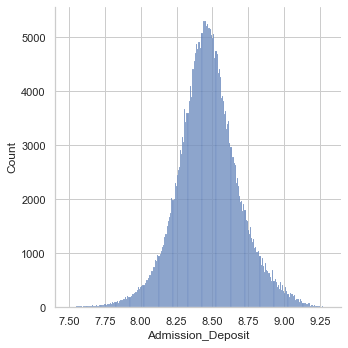

In [215]:
sns.displot(x = np.log(raw_train_data.Admission_Deposit), kind='hist')

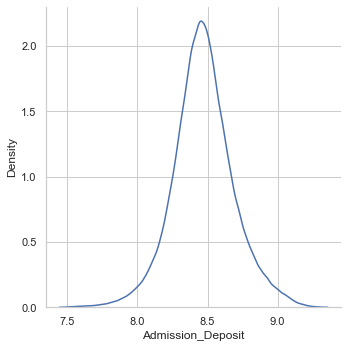

In [216]:
sns.displot(x = np.log(raw_train_data.Admission_Deposit), kind='kde')

(array([  2975.,  26059., 103190., 112815.,  45913.,  16963.,   6939.,
          2729.,    726.,    129.]),
 array([ 1800. ,  2720.8,  3641.6,  4562.4,  5483.2,  6404. ,  7324.8,
         8245.6,  9166.4, 10087.2, 11008. ]),
 <BarContainer object of 10 artists>)

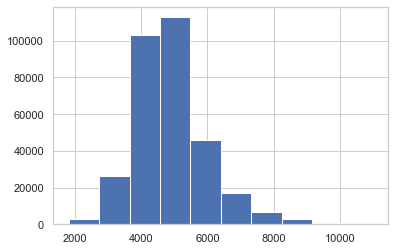

In [217]:
plt.hist(raw_train_data.Admission_Deposit)

In [218]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_train_data['Stay'] = lb.fit_transform(raw_train_data['Stay'])
raw_train_data['Stay']

0         0
1         4
2         3
3         4
4         4
         ..
318433    1
318434    3
318435    1
318436    1
318437    0
Name: Stay, Length: 318438, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='Stay'>

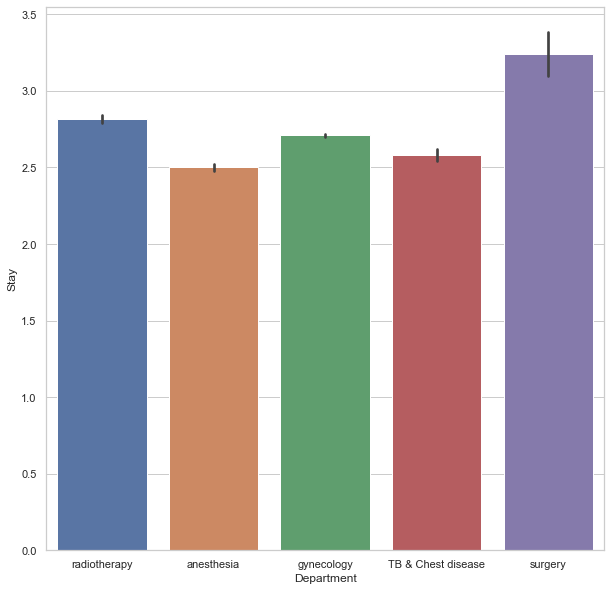

In [219]:
#fig, axs = plt.subplots(ncols=2)
fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(data=raw_train_data, x='Department', y='Stay',ax=ax)
#sns.countplot(data=raw_train_data, x='Department')

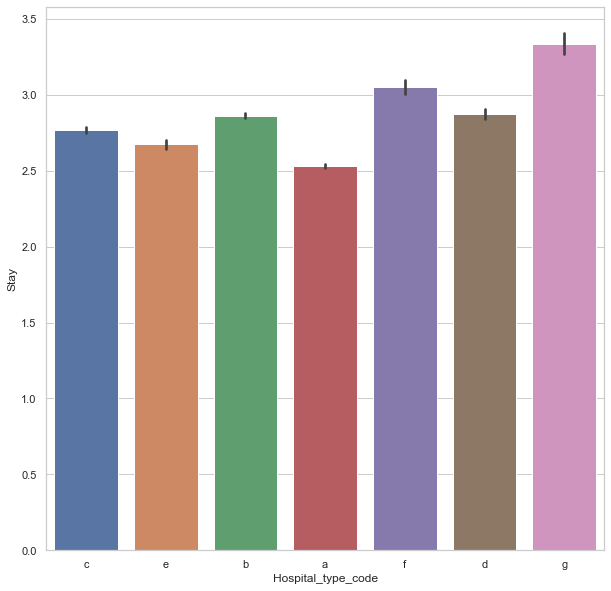

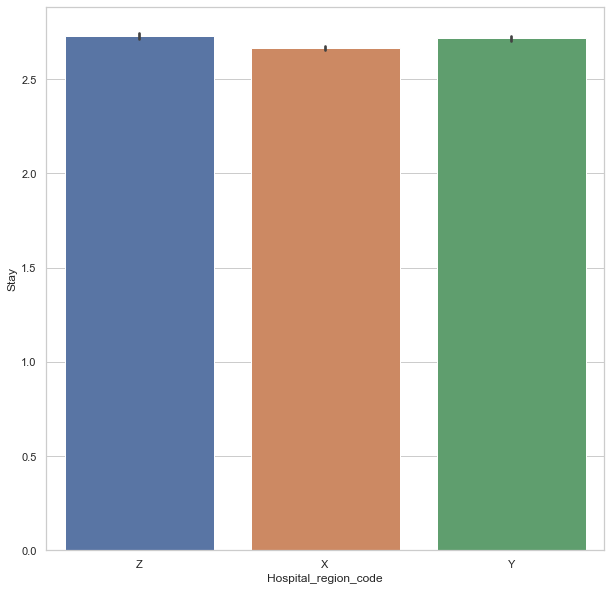

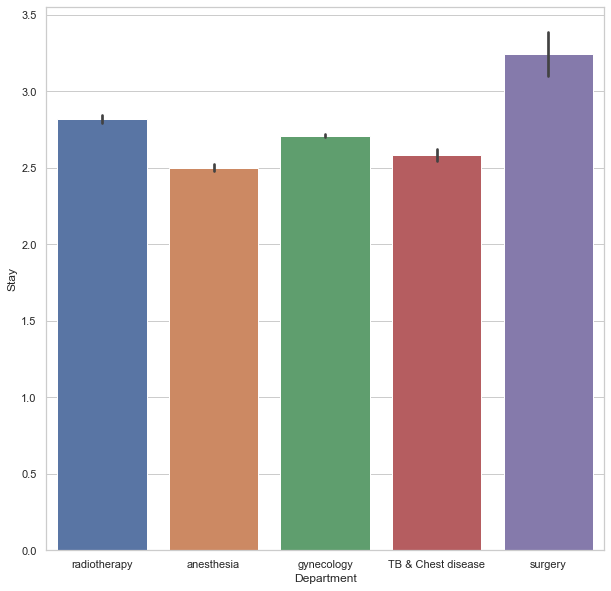

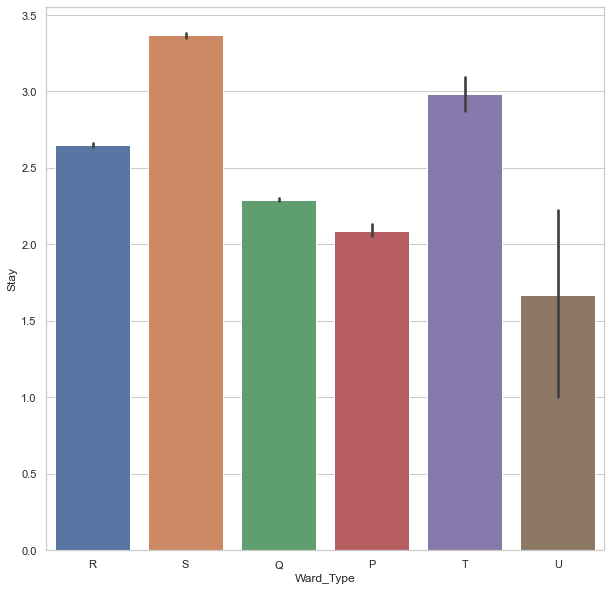

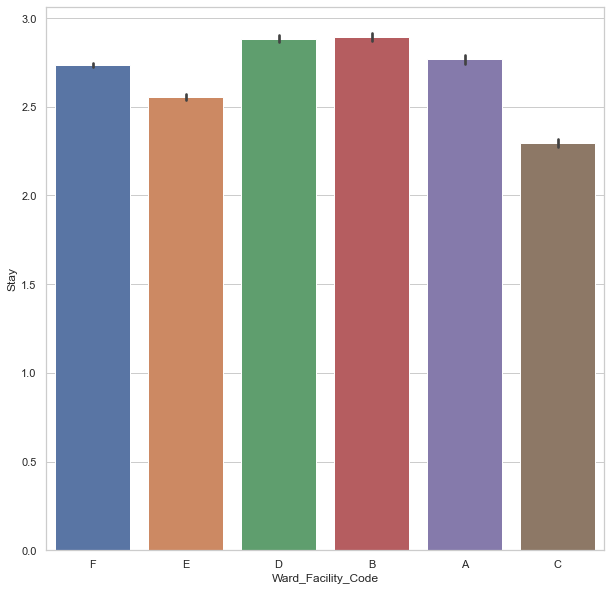

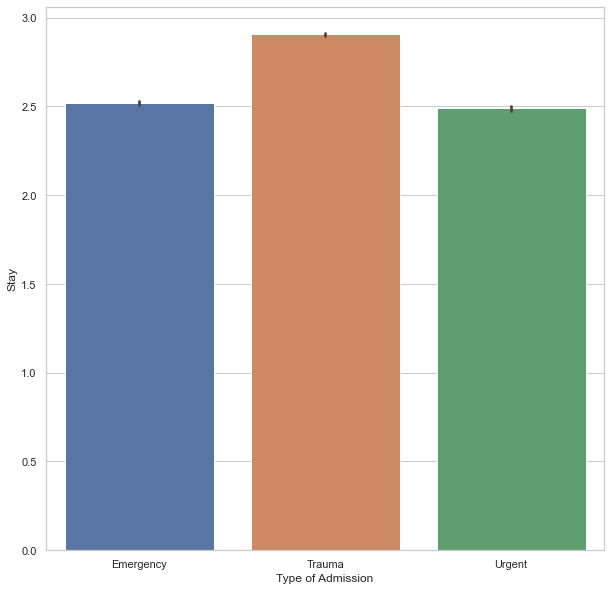

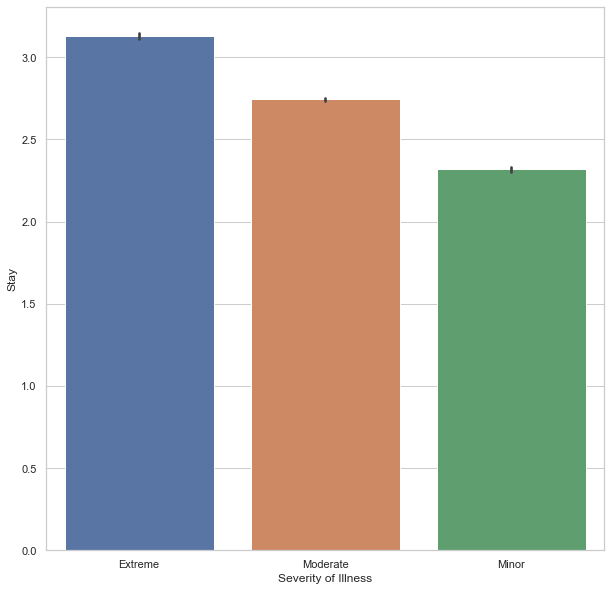

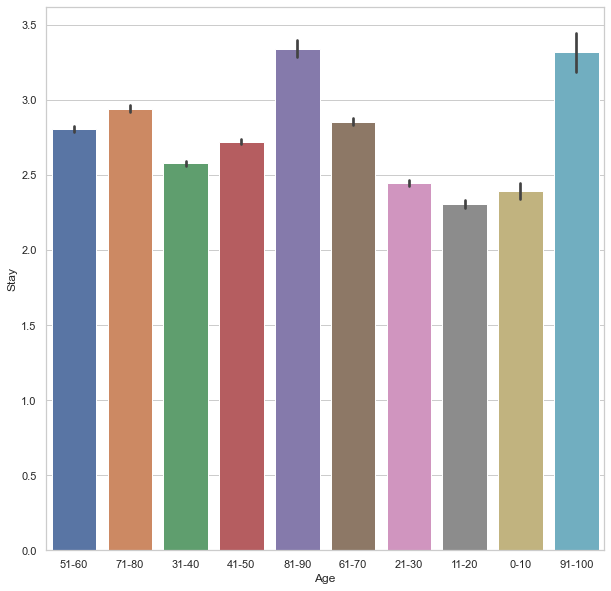

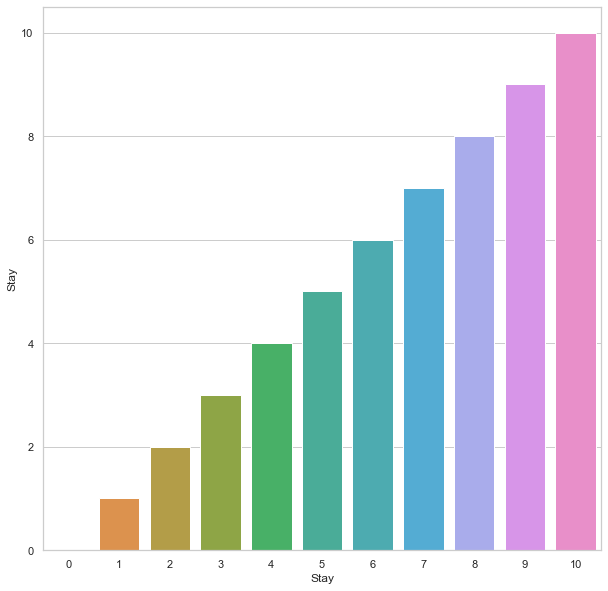

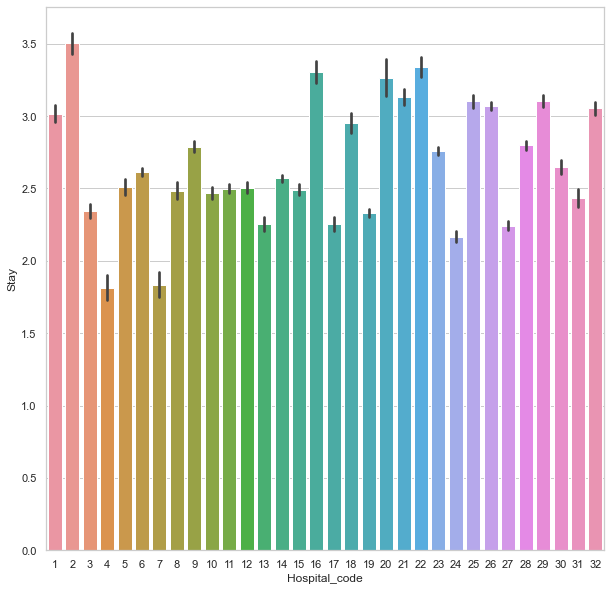

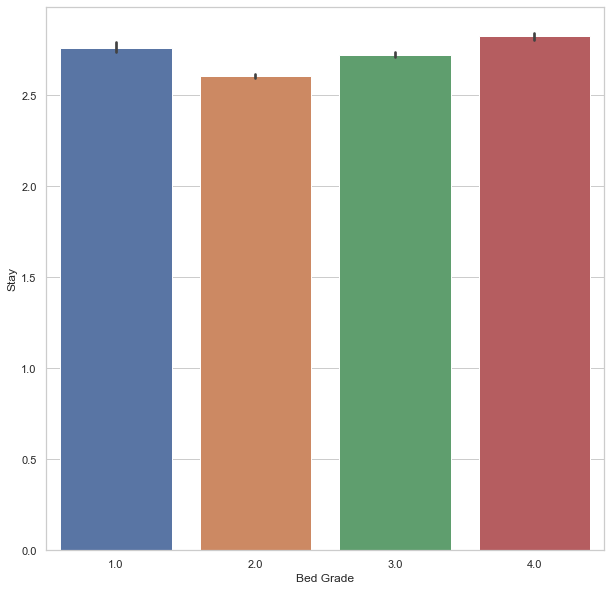

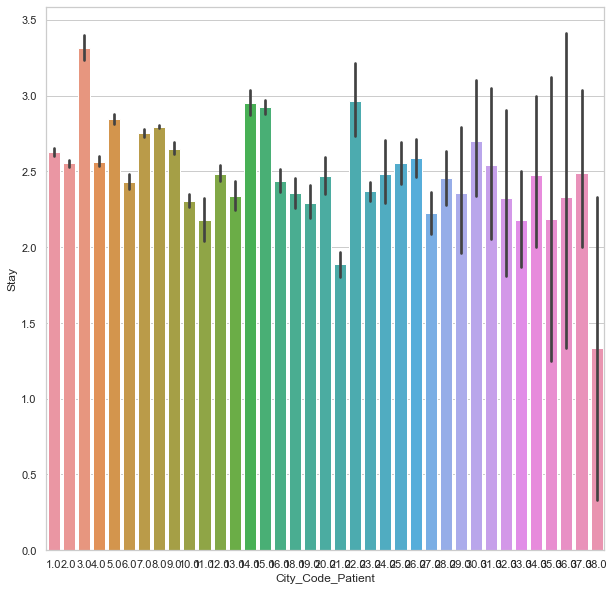

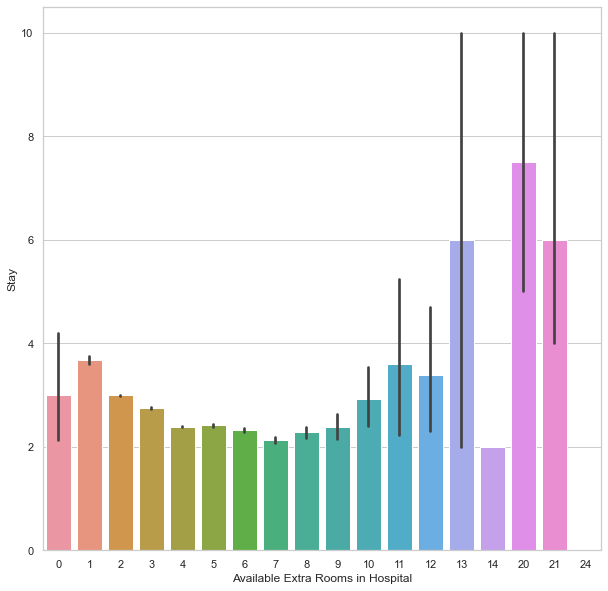

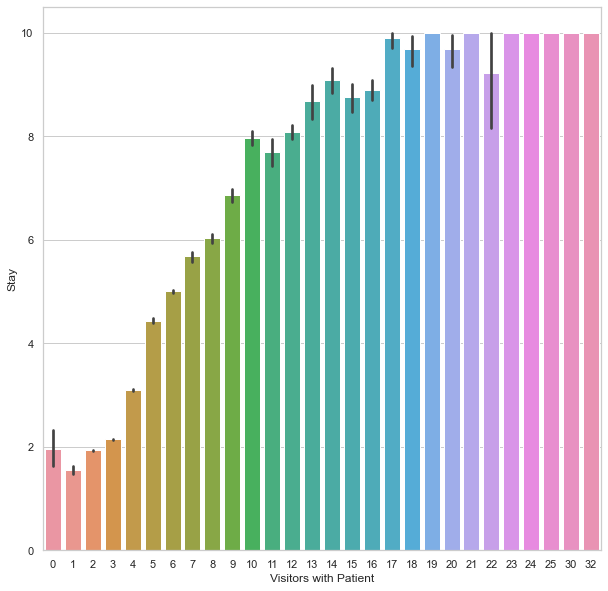

In [220]:
for i in cat_features:
    fig, ax = plt.subplots(figsize=(10,10))
    sns.set_theme(style="whitegrid")
    sns.barplot(data=raw_train_data, x=i, y='Stay',ax=ax)

<AxesSubplot:xlabel='Bed Grade', ylabel='Stay'>

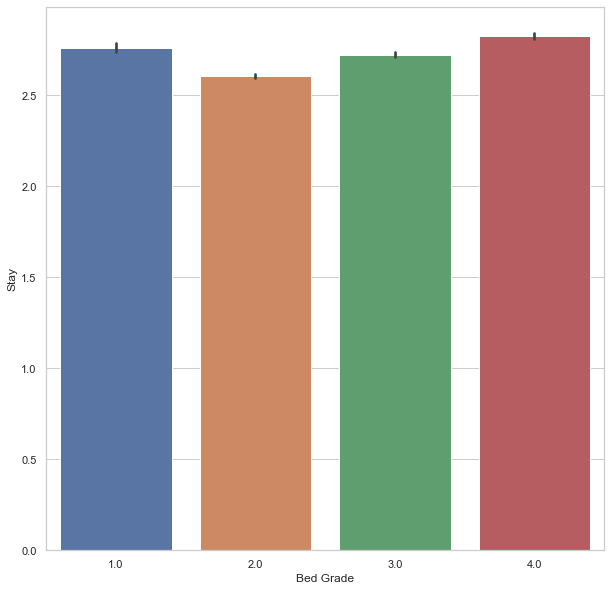

In [221]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(data=raw_train_data, x='Bed Grade', y='Stay',ax=ax)

In [222]:
raw_train_data['Visitors with Patient'].value_counts()

2     138417
4      79225
3      59180
6      18860
5       9219
8       4872
7       2504
9       1358
1       1207
10      1183
12       968
11       327
16       286
14       207
15       194
13       106
24        78
20        62
18        61
0         22
17        20
22        19
19        12
25        12
21        11
23        10
30         9
32         9
Name: Visitors with Patient, dtype: int64

### 4.3 Determine the Data Quality Issues - Missing Values and Outliers

In [223]:
# get the missing values
raw_train_data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [224]:
#There are missing values in Bed Grade and City_Code_Patient which are 0.035% and 1.44%. % of missing values is very less so we can perform imputation without any hesistation.

| Feature | Data Quality Issues | Potential Handling Strategies |
| ----------- | ----------- | ----------- |
| Bed Grade | 113 Missing Values | 0.035% missing values. We are not dropping any data. We will perform imputation with Median. |
| City_Code_Patient | 4532 Missing Values | 1.44% missing values. We are not dropping any data. We will perform imputation with Median|

### 4.4 Handling Data Quality Issues

In [225]:
# handling missing values on Bed Grade
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
si.fit(raw_train_data[['Bed Grade']])
raw_train_data['Bed Grade'] = si.transform(raw_train_data[['Bed Grade']])
raw_train_data.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [226]:
# handling missing values on City_Code_Patient
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,  
                        strategy ='median')
si.fit(raw_train_data[['City_Code_Patient']])
raw_train_data['City_Code_Patient'] = si.transform(raw_train_data[['City_Code_Patient']])
raw_train_data.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## 4.4 Data Preperation

> We will use encodings on following descriptive features: 
     Age,
     Severity of Illness,
     Bed Grade,
     City_Code_Patient.

In [227]:
# encoding on age
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_train_data['Age'] = lb.fit_transform(raw_train_data['Age'])
raw_train_data['Age']

0         5
1         5
2         5
3         5
4         5
         ..
318433    4
318434    8
318435    7
318436    1
318437    1
Name: Age, Length: 318438, dtype: int64

#### Encoding Severity of Illness: 
0: Extreme
1: Moderate
2: Minor

In [228]:
# encoding on severity of illness
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_train_data['Severity of Illness'] = lb.fit_transform(raw_train_data['Severity of Illness'])
raw_train_data['Severity of Illness']

0         0
1         0
2         0
3         0
4         0
         ..
318433    2
318434    2
318435    1
318436    1
318437    1
Name: Severity of Illness, Length: 318438, dtype: int64

<AxesSubplot:xlabel='Stay', ylabel='Admission_Deposit'>

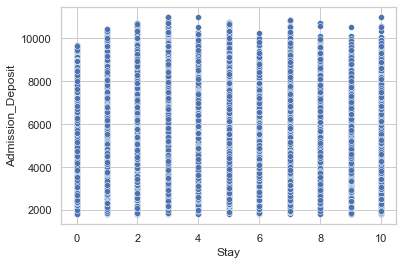

In [231]:
sns.scatterplot(data=raw_train_data, y='Admission_Deposit', x='Stay')

<!-- #### Stay encoding: 

0-10: 0,


11-20: 1,


21-30: 2,


31-40: 3,


41-50: 4,


51-60: 5,


61-70: 6,
.
.
.
. -->

In [230]:
# finally printing data
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,0,2,5,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,0,2,5,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,0,2,5,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,0,2,5,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,2,3,4,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,2,4,8,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,1,3,7,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,1,5,1,3761.0,1


<AxesSubplot:>

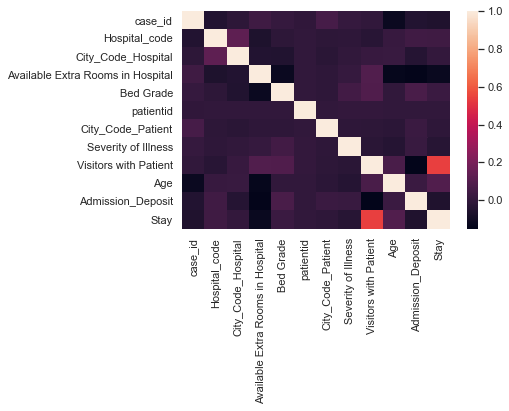

In [233]:
sns.heatmap(raw_train_data.corr())

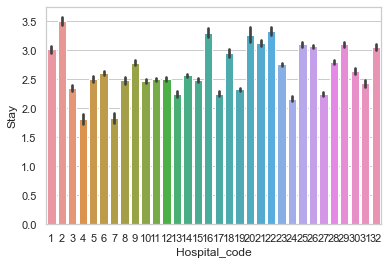

In [247]:
sns.barplot(data=raw_train_data, x='Hospital_code', y='Stay')

<AxesSubplot:xlabel='Stay', ylabel='Admission_Deposit'>

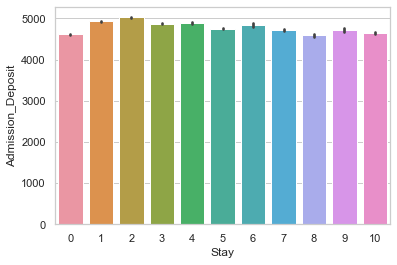

In [249]:
sns.

In [244]:
raw_train_data['Hospital_code'].unique()

array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20])

In [250]:
raw_train_data.corr()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013691,-0.004150,0.065207,0.013935,0.001309,-0.114694,-0.045972,-0.053882
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013948,0.002291,-0.015477,-0.007585,-0.028500,0.016322,0.045446,0.042846
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049248,0.000750,-0.024161,-0.000018,0.018184,0.020507,-0.034455,0.006381
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115804,0.000921,-0.009462,0.015053,0.096714,-0.133491,-0.143739,-0.121120
Bed Grade,0.013691,-0.013948,-0.049248,-0.115804,1.000000,0.001638,-0.007581,0.049951,0.088920,0.001717,0.073779,0.025761
patientid,-0.004150,0.002291,0.000750,0.000921,0.001638,1.000000,0.002009,0.004444,0.006889,-0.001505,-0.000877,0.001125
City_Code_Patient,0.065207,-0.015477,-0.024161,-0.009462,-0.007581,0.002009,1.000000,-0.007774,-0.011677,-0.016282,0.025485,-0.009447
Severity of Illness,0.013935,-0.007585,-0.000018,0.015053,0.049951,0.004444,-0.007774,1.000000,-0.020670,-0.036090,0.023993,-0.031188
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088920,0.006889,-0.011677,-0.020670,1.000000,0.073795,-0.150358,0.537537
Age,-0.114694,0.016322,0.020507,-0.133491,0.001717,-0.001505,-0.016282,-0.036090,0.073795,1.000000,0.025182,0.094163


In [253]:
import altair as alt
hosp_visits=raw_train_data['Hospital_code'].value_counts().to_frame().reset_index().rename(columns={'index':'hospital','Hospital_code':'total'})

base = alt.Chart(hosp_visits)

bar = base.mark_bar(color='royalblue').encode(
    x=alt.X('total', bin=alt.Bin(step=2500)),
    y='count()',
    tooltip=[alt.Tooltip('count():Q')]
    
).properties(
    width=600,
    height=400,
    title="Cases observed in each Hospital with Global Mean"
)

rule = base.mark_rule(color='red').encode(
    x='mean(total)',
    size=alt.value(5),
    tooltip=[alt.Tooltip('mean(total):Q')]
)

(bar + rule)

alt.LayerChart(...)

1. Cases per Hospital //Done
3. How many hospitals fall in each cities //Done
4. How many cases did each hospitals conduct over cities 
5. How often did the patient visit hospital? //Done
6. Do the patient prefer same hospital everytime? //Done
7. Which is the most visited department? //Done
9. Do older people stay longer ? //Done
11. Is initial admission deposit related to their stay? //Done
13. How long patient stay based on severity //Done
14. Are Age & Stay Days related to Severeness 
15. Is bed alloted based on severeness 
16. Are there more visitors for patients with severe illness 
17. Do hospitals provide extra rooms for long stay 
18. How many hospital types fall in each region 

### Cases per Hospital?

In [287]:
hosp_visits=raw_train_data['Hospital_code'].value_counts().to_frame().reset_index().rename(columns={'index':'hospital','Hospital_code':'total'})

In [288]:
hosp_visits

,hospital,total
0,26,33076
1,23,26566
2,19,21219
3,6,20425
4,14,17328
5,11,17328
6,28,17137
7,27,14244
8,9,11510
9,29,11311


In [290]:
hosp_visits['total'].sum() / 32

9951.1875

#### Observations : 
    - 32 hospitals have dealt 318438 admission cases for 92017 patients
    - Global average ratio of cases to hospital : 9951 cases per hospital

### Which city has the highest number of hospitals and which city has the lowest number of hospitals?

In [330]:
hosp_cities = raw_train_data.groupby(['City_Code_Hospital', 'Hospital_code']).size().to_frame()

In [331]:
hosp_cities.rename({0: 'total'}, inplace=True, axis=1)

In [332]:
hosp_cities.drop('total', axis=1, inplace=True)

In [333]:
hosp_cities = hosp_cities.reset_index()

In [334]:
hosp_cities['City_Code_Hospital'].value_counts()

1     6
3     6
5     4
2     3
4     3
9     3
6     2
7     2
10    1
11    1
13    1
Name: City_Code_Hospital, dtype: int64

#### Observations: 
    As you can see city 1, city 3 has the highest number of hospitals.
    City 10, 11, 13 has the lowest number of hospitals.

### Do the patients prefer same hospital everytime?

In [342]:
unique_ids = raw_train_data['patientid'].unique()

In [362]:
patient_hosp = raw_train_data.groupby(['patientid', 'Hospital_code']).size().to_frame()

In [364]:
patient_hosp.drop(0, axis=1, inplace=True)

In [374]:
count_patients_visits = patient_hosp.groupby('patientid').size().sort_values(ascending=False).to_frame()

In [376]:
count_patients_visits.rename({0: 'number'}, inplace=True, axis=1)

In [381]:
count_patients_visits.reset_index(inplace=True)

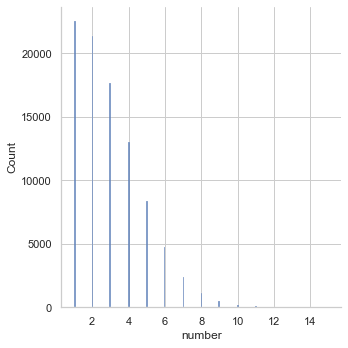

In [385]:
sns.displot(count_patients_visits['number'])

#### Observations: 
As you can see, most patients visits only one hospital. There are more than 20,000 patients who visited a single hospital only.

### Which is the most visited department?

In [386]:
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,0,2,5,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,0,2,5,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,0,2,5,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,0,2,5,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,2,3,4,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,2,4,8,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,1,3,7,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,1,5,1,3761.0,1


In [432]:
raw_train_data.groupby(['patientid', 'Department']).size()

patientid  Department        
1          gynecology            4
2          anesthesia            1
           gynecology            1
4          gynecology            2
6          gynecology            1
                                ..
131621     gynecology            3
131622     TB & Chest disease    1
           gynecology            3
131623     gynecology            2
131624     gynecology            3
Length: 123861, dtype: int64

In [434]:
dept_visits = raw_train_data.groupby(['Department']).size().to_frame().reset_index()

In [436]:
dept_visits.rename({0:'total_visits'}, inplace=True, axis=1)

<AxesSubplot:xlabel='total_visits', ylabel='Department'>

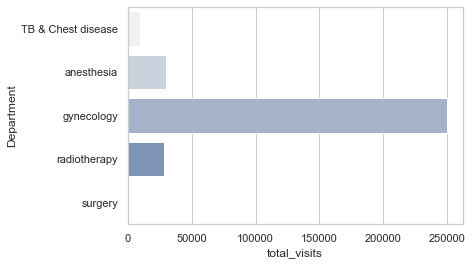

In [454]:
sns.barplot(data=dept_visits, x = 'total_visits', y='Department', palette='light:b')

#### Obseravtions: 
    Gynecology department has most number of visitors

### Frequency of visits of patients?

In [422]:
num_visits_patients= raw_train_data['patientid'].value_counts().to_frame()

In [423]:
num_visits_patients.reset_index(inplace=True)

In [424]:
num_visits_patients.rename({'index':'patientid', 'patientid': 'total_visits'}, inplace=True, axis=1)

In [429]:
num_visits_patients.groupby('total_visits').size()

total_visits
1     20349
2     18535
3     15656
4     12336
5      9266
6      6292
7      4054
8      2342
9      1396
10      761
11      400
12      273
13      111
14       74
15       56
16       26
17       24
18       17
19        7
20        8
21        5
22        5
23        4
24        2
25        2
26        3
27        2
28        1
29        1
30        2
31        1
32        1
34        1
36        1
39        1
43        1
50        1
dtype: int64

<AxesSubplot:xlabel='total_visits', ylabel='patientid'>

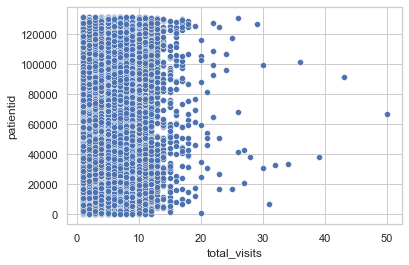

In [430]:
sns.scatterplot(data = num_visits_patients, x = "total_visits", y = "patientid")

In [431]:
20349 / 92017

0.22114391905843486

#### Observations:
        As you can see 22% of total patients visited hospital for once only.
        50% of patients have tried more than 3 hospitals

### Do older people stay longer ?

In [455]:
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,0,2,5,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,0,2,5,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,0,2,5,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,0,2,5,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,2,3,4,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,2,4,8,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,1,3,7,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,1,5,1,3761.0,1


In [472]:
age_stay = raw_train_data.groupby(['Age', 'Stay']).size().to_frame()

<AxesSubplot:xlabel='Age', ylabel='Stay'>

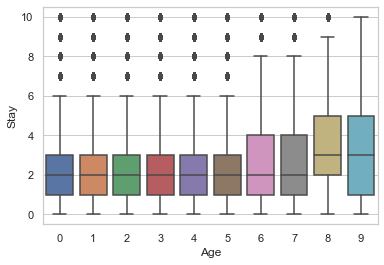

In [514]:
sns.boxplot(data=raw_train_data, x = 'Age', y = 'Stay')

In [509]:
age_count = raw_train_data.groupby('Age').size().to_frame().reset_index()

In [511]:
age_count.rename({0:'total_count'}, inplace=True, axis=1)

<AxesSubplot:xlabel='Age', ylabel='total_count'>

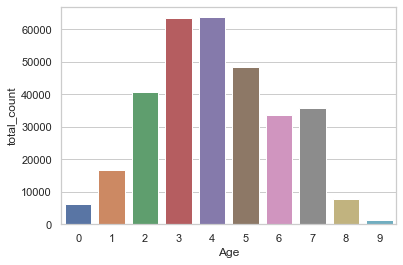

In [513]:
sns.barplot(data=age_count, x = 'Age', y = 'total_count')

In [486]:
raw_train_data[raw_train_data['Age'] >= 8].count()

case_id                              9192
Hospital_code                        9192
Hospital_type_code                   9192
City_Code_Hospital                   9192
Hospital_region_code                 9192
Available Extra Rooms in Hospital    9192
Department                           9192
Ward_Type                            9192
Ward_Facility_Code                   9192
Bed Grade                            9192
patientid                            9192
City_Code_Patient                    9192
Type of Admission                    9192
Severity of Illness                  9192
Visitors with Patient                9192
Age                                  9192
Admission_Deposit                    9192
Stay                                 9192
dtype: int64

#### Observations: 
As you can see age affects length of stay as older people tend to stay longer in hospitals.

<AxesSubplot:xlabel='Stay', ylabel='Admission_Deposit'>

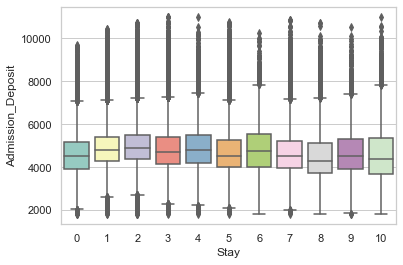

In [501]:
sns.boxplot(data=raw_train_data, x = 'Stay', y='Admission_Deposit',  palette="Set3")

In [467]:
hospital_depts

patient_count
Hospital_code Department                       
1             TB & Chest disease            176
              anesthesia                    302
              gynecology                   4384
              radiotherapy                  372
              surgery                        15
...                                         ...
32            TB & Chest disease            408
              anesthesia                    745
              gynecology                   8598
              radiotherapy                  918
              surgery                        34

[160 rows x 1 columns]

In [502]:
raw_train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,0,2,5,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,0,2,5,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,0,2,5,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,0,2,5,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,2,3,4,4144.0,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,2,4,8,6699.0,3
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,1,3,7,4235.0,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,1,5,1,3761.0,1


### Relationship between stay and severity of illness?

<AxesSubplot:xlabel='Severity of Illness', ylabel='Stay'>

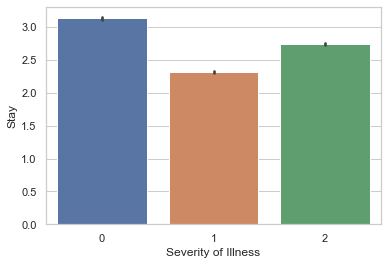

In [505]:
sns.barplot(data=raw_train_data, y = 'Stay', x = 'Severity of Illness')

#### Observations: 
    As you can see 0,i.e. extreme cases have significantly higher length of stay.

In [526]:
illness_data = raw_train_data.groupby('Severity of Illness').size().to_frame().reset_index()
illness_data.rename({0:'total_count'}, inplace=True, axis=1)

<AxesSubplot:xlabel='Severity of Illness', ylabel='total_count'>

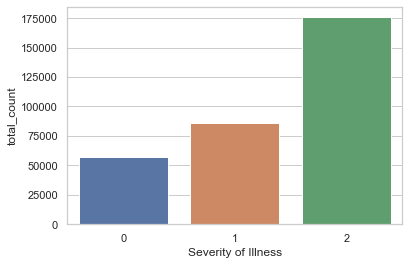

In [528]:
sns.barplot(data=illness_data, x = 'Severity of Illness', y='total_count')

#### Observations:
    50%+ patients in given data are having minor severity.

In [533]:
count_severity = raw_train_data.groupby(['Severity of Illness', 'Age']).size().to_frame().reset_index()

In [536]:
count_severity.rename({0: 'total_count'}, inplace=True, axis=1)

In [537]:
count_severity

,Severity of Illness,Age,total_count
0,0,0,658
1,0,1,1358
2,0,2,4237
3,0,3,10219
4,0,4,13393
5,0,5,10467
6,0,6,7215
7,0,7,7038
8,0,8,1842
9,0,9,296


In [551]:
illness_data

,Severity of Illness,total_count
0,0,56723
1,1,85872
2,2,175843
